In [6]:
# Armamos un dataset a medida con un criterio "dendografico" en 2D
import numpy as np
import pandas as pd

def generar_data(N_pasos,N_divisiones):

  X = []
  Y = []
  x=0
  y=0
  Distancia = 10
  Desviacion_relativa = 0.1

  def generar_coordenadas(X,Y,x,y,Distancia,Desviacion_relativa,pasos_restantes):
    if pasos_restantes == 0:
        X.append(x)
        Y.append(y)
    else:
      if np.random.rand() < 1/pasos_restantes:
        X.append(x)
        Y.append(y)
      else:
        for i in range(N_divisiones):
          x_new = x + np.random.normal(Distancia,Desviacion_relativa*Distancia)*(np.random.rand()-0.5)
          y_new = y + np.random.normal(Distancia,Desviacion_relativa*Distancia)*(np.random.rand()-0.5)
          Distancia_new = Distancia/(1+np.random.rand())
          generar_coordenadas(X,Y,x_new,y_new,Distancia_new,Desviacion_relativa,pasos_restantes-1)
    return X,Y

  x_out,y_out = generar_coordenadas(X,Y,x,y,Distancia,Desviacion_relativa,N_pasos)

  df = pd.DataFrame({
      "x" : x_out,
      "y" : y_out,
  })

  return df

<AxesSubplot:xlabel='x', ylabel='y'>

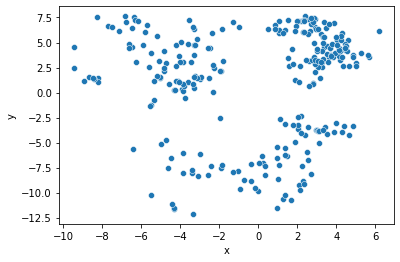

In [7]:
import pandas as pd
import seaborn as sns


df = generar_data(7,3)
df.head()
sns.scatterplot(data = df, x = "x", y = "y")

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.cluster import hierarchy 
from scipy.spatial.distance import pdist
from matplotlib import pyplot as plt


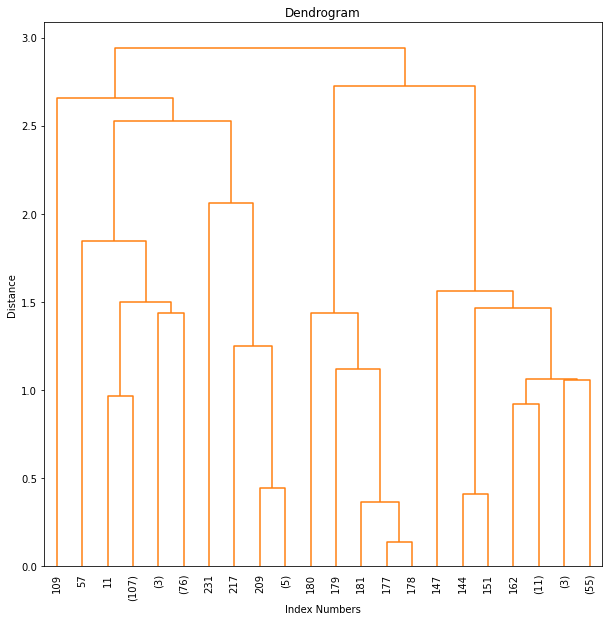

In [9]:
Z = linkage(df, 'single')

plt.figure(figsize=[10,10])
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=10.,  
    color_threshold=10,
    truncate_mode='level',
    p=5
)
plt.show()

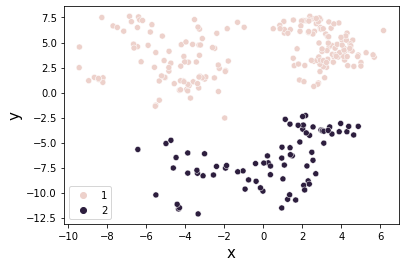

Cophenetic coefficient: 0.7934887819907668


In [12]:
labels=fcluster(Z,2,criterion='maxclust')
sns.scatterplot(data = df, x = "x", y = "y", hue=labels, legend='full')
plt.xlabel('x',fontsize=15)
plt.ylabel('y',fontsize=15)
plt.show()


c,dists=cophenet(Z, pdist(df))
print('Cophenetic coefficient:',c)

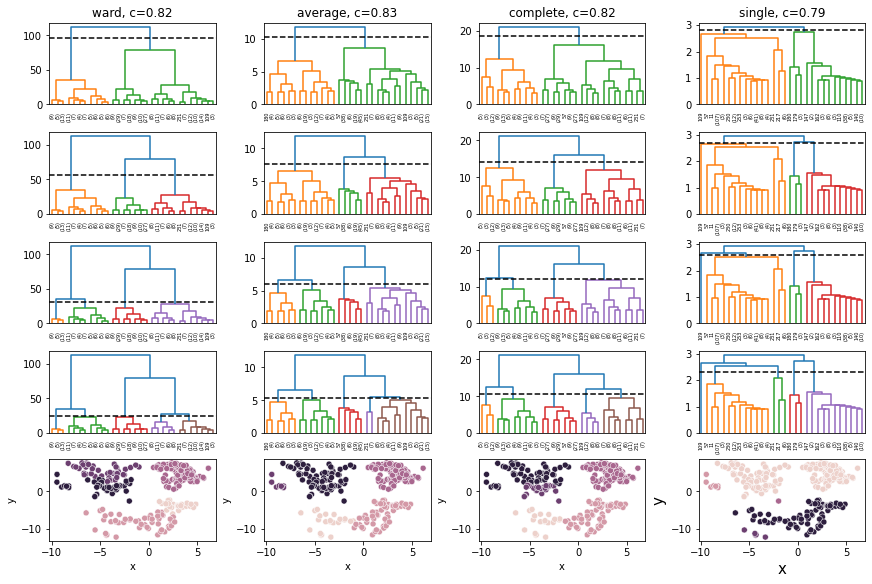

In [13]:

tipos = {0:"ward",1:"average",2:"complete",3:"single"}
n_max = 5
fig, axs = plt.subplots(n_max, 4,figsize=(12,8),constrained_layout=True)

k_values = list(range(2,n_max+1))


for tipo in tipos:
  Z = linkage(df, tipos[tipo])
  for k in k_values:
    distancia_corte = (Z[-k+1][2] + Z[-k][2])/2
    dendrogram(
        Z,
        leaf_rotation=90.,  
        leaf_font_size=5.,  
        color_threshold=distancia_corte,  
        truncate_mode='lastp', # Ver que pasa si se pone none
        ax = axs[k-2,tipo]
    )
    axs[k-2,tipo].axhline(distancia_corte,color='black',ls='--')
  c,dists=cophenet(Z, pdist(df))
  axs[0,tipo].set_title(tipos[tipo] +', c='+str(np.around(c,2)))        

  labels=fcluster(Z,n_max,criterion='maxclust')
  sns.scatterplot(data = df, x = "x", y = "y", hue=labels, ax=axs[n_max-1][tipo], legend=False)
  plt.xlabel('x',fontsize=15)
  plt.ylabel('y',fontsize=15)






In [ ]:
Z[-5:]

array([[277.        , 282.        ,  12.2168729 ,  51.        ],
       [283.        , 284.        ,  18.27208011,  62.        ],
       [280.        , 281.        ,  21.10806291,  47.        ],
       [279.        , 286.        ,  29.80145809,  83.        ],
       [285.        , 287.        ,  54.74420873, 145.        ]])